<a href="https://colab.research.google.com/github/juHa1205/NLP_2023/blob/main/%5B%ED%95%99%EC%83%9D%EC%A0%9C%EA%B3%B5_%EB%AC%B8%EC%A0%9C%5D10%EC%9B%9417%EC%9D%BC_1_%EC%8B%A4%EC%8A%B5__KNN_wine_data_for_loop_%ED%8F%AC%ED%95%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.frame

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [ ]:
wine.data.shape

(178, 13)

In [ ]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
AAA =pd.DataFrame(wine.data)

In [ ]:
AAA

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
df =pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
df.shape

(178, 13)

# 문제 1

In [ ]:
df = df.assign(target = wine.target)

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# 문제 2 그림 그리기

<Axes: xlabel='alcohol', ylabel='total_phenols'>

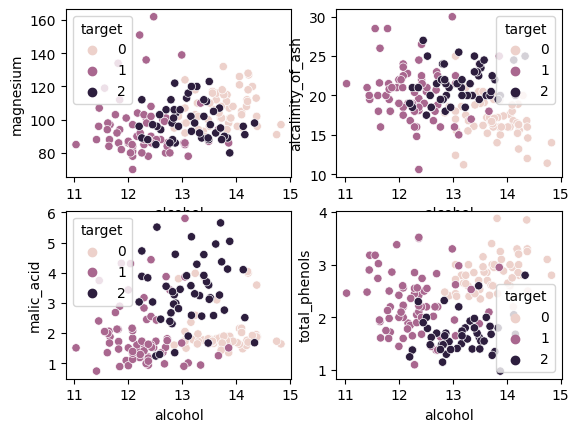

In [ ]:
import seaborn as sns

plt.subplot(2,2,1)
sns.scatterplot(data=df,x='alcohol',y='magnesium',hue='target')
plt.subplot(2,2,2)
sns.scatterplot(x=df['alcohol'],y=df['alcalinity_of_ash'],hue=df['target'])
plt.subplot(2,2,3)
sns.scatterplot(x=df['alcohol'],y=df['malic_acid'],hue=df['target'])
plt.subplot(2,2,4)
sns.scatterplot(x=df['alcohol'],y=df['total_phenols'],hue=df['target'])


# 문제 3 다음의 X,y를 이용하여 X_train, y_train, X_test, y_test를 나누기

In [ ]:
X = wine.data
y =wine.target
X.shape, y.shape

((178, 13), (178,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify = y)

In [ ]:
X_train.shape

(124, 13)

In [ ]:
y_train.shape

(124,)

In [ ]:
y_train

array([0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2,
       1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1,
       1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1])

In [ ]:
# train 데이터와 test 데이터 나눈후 아래 실행하여 결과 확인하기

print(X_test.shape)
print(y_test.shape)

(54, 13)
(54,)


# 문제 4

# k=3일때 KNN 이용--> test데이터에 대한 정확도 구하기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics  # 성능지표

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print('Accuraacy: ', metrics.accuracy_score(y_test,y_predict))


Accuraacy:  0.6851851851851852


# 문제 5 for loop 사용하여 k에 따른 mean_error와 accuracy구하기

In [ ]:
error = [ ]

for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

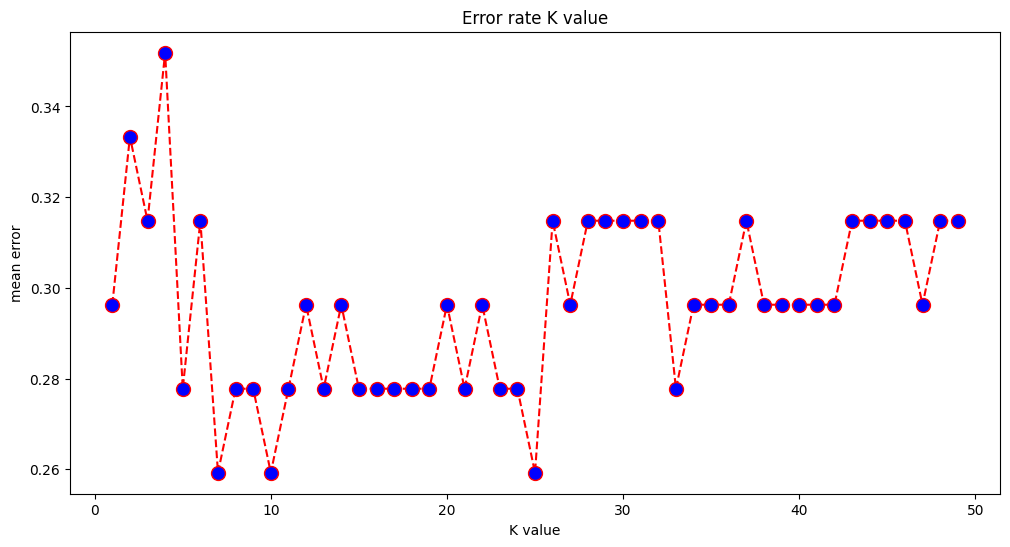

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50), error, color='red',linestyle='dashed',marker='o',markerfacecolor = 'blue',markersize = 10)
plt.title("Error rate K value")
plt.xlabel('K value')
plt.ylabel("mean error")
plt.show()

# 문제 6 최적 조건 k에서 test 데이터에 대한 정확도 구하기

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test,y_predict))

Accuracy:  0.7407407407407407
